<div align="center">

# National Tsing Hua University

### Fall 2023

#### 11210IPT 553000

#### Deep Learning in Biomedical Optical Imaging

## Homework 2

</div>


### ✏️ Task A: Transitioning to Cross-Entropy Loss (20 pts)

In Lab, we utilized the **Binary Cross-Entropy (BCE) Loss** for a binary classification task. The BCE loss is articulated as:

$$ \text{BCE}(y, \hat{y}) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$

Here, $y$ is the true label (0 or 1), and $\hat{y}$ denotes the predicted probability of $y=1$.

In this task, we aim to explore the implementation of a model using **Cross-Entropy (CE) Loss**, which is a more common approach for classification tasks, especially when dealing with multiple classes. CE loss is expressed as:

$$ \text{CE}(y, \hat{y}) = -\sum_{i} y^{(i)} \log(\hat{y}^{(i)}) $$

In this expression, $y$ represents the ground truth labels, $ \hat{y} $ is the predictions from your model, and $i$ is the index of the class.


#### 1. Modify the Loss (3 pts)
Transition to using Cross-Entropy (CE) Loss for the classification task by utilizing PyTorch's built-in functionalities. You can refer to the [official PyTorch documentation](https://pytorch.org/docs/stable/nn.html) for detailed information and guidance to ensure the correct implementation of the CE loss.

In [ ]:
import torch.nn as nn

# Replace '...' with the appropriate loss function in PyTorch
loss = nn.CrossEntropyLoss

#### 2. Modify the Model Architecture (2 pts)
To adapt the original code for use with Cross-Entropy (CE) loss, make necessary modifications to the model architecture. Ensure it is compatible and optimized for the application of CE loss. Consider the number of output nodes and the activation function used in the output layer for effective multi-class classification.

In [ ]:
# Modifying the architecture to be compatible with CE loss
ce_model = nn.Sequential(
    nn.Flatten(),          #將輸入的多維向量轉成一維向量
    nn.Linear(256*256*1, 256),   #輸入特徵數量 輸出特徵數量
    nn.ReLU(),            #激活函數，增強模型表示能力
    nn.Linear(256, 5)        #(256,1)→(256,n) n=5 分類中實際分類的類別數
 ).cuda()

print(ce_model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=65536, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=5, bias=True)
)


#### 3. Reflection Questions (15 pts, 5 pts for each)
Provide detailed answers to the questions below:

**Q1. Loss Function Comparison:**  
   What are the differences between Binary Cross-Entropy (BCE) loss and Cross-Entropy (CE) loss?

**Q2. Model Architecture Modification:**  
   What motivated the specific changes you made to the model architecture?

**Q3. Adapting to CE Loss:**  
   In the original code configured for BCE loss, two major adjustments are needed for adaptation to CE loss. Analyze and explain the necessity for these changes, referring to the code below.

```python
for images, labels in train_loader:
    images = images.cuda()
    images = images / 255.0
    labels = labels.cuda()
    optimizer.zero_grad()
    outputs = model(images)

    # Change #1: Adaptation to the labels for CE loss
    labels = labels.long()  # Changed from labels.float().unsqueeze(1) for BCE loss

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

    # Change #2: Predictions for CE loss
    train_predicted = outputs.argmax(-1)  # Changed from torch.sigmoid(outputs) > 0.5 for BCE loss
    train_correct += (train_predicted == labels).sum().item()
```

#### Put Your Response Here:

##### 1. 交叉熵適用於多分類問題，例如圖像、語音識別;而二元交叉熵則適用於二元分類問題，例如垃圾郵件檢測、感情分析。

##### 2. 由於BCE和CE對於特徵分類不同，依據要考慮的分類數多寡，將output layer改成所需的分類數量。

##### 3. Change1 : BCE loss屬於二元分類，以機率表示標籤，標籤表示以float(1.0 or 0機率)作表示歸類；而CE loss屬於多類別分類，確保標籤能被視為個類別索引，標籤表示以整數表示，通常以Long作為資料型態。
##### Change2 : BCE loss以sigmoid作為激活函數，並以0.5作為閥值預測類別。如果輸出大於0.5為正類，小於0.5為負類。而CE屬於多類別分類，要預測類別，則必須從所有類別中選出機率最高的類別，透過使用outputs.argmax(-1)，實現獲得最高機率的索引類別。

### ✏️ Task B: Creating an Evaluation Code (20 pts)

Evaluate the performance of a pretrained deep learning model with a test dataset of chest X-ray images available in `test_normal.npy` and `test_pneumonia.npy` files. These files respectively contain 200 grayscale normal and pneumonia chest X-ray images, each of size 256×256. The objective is to calculate the model’s accuracy, defined as the percentage of images correctly classified. To accomplish this, you are tasked to write code that loads, processes, and evaluates the model on this specific dataset. Ensure each segment of code replacing the `...` placeholders is functional and aligns with the steps provided in the instructions.

**Note: ⚠️ Ensure to upload your trained model's weights to your working environment if needed.**

### Step 0: Download test dataset

In [ ]:
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_normal.npy
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_pneumonia.npy

--2023-10-13 05:20:02--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_normal.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13107328 (12M) [application/octet-stream]
Saving to: ‘test_normal.npy’

test_normal.npy     100%[===================>]  12.50M  --.-KB/s    in 0.1s    

2023-10-13 05:20:02 (120 MB/s) - ‘test_normal.npy’ saved [13107328/13107328]

--2023-10-13 05:20:02--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_pneumonia.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

### Step 1: Prepare your test dataset

In [ ]:
import numpy as np

test_abnormal = np.load('test_pneumonia.npy')
test_normal = np.load('test_normal.npy')

print(f'Shape of test_abnormal: {test_abnormal.shape}')
print(f'Shape of test_normal: {test_normal.shape}')

# For the data having presence of pneumonia assign 1, for the normal ones assign 0.
test_abnormal_labels = np.ones((test_abnormal.shape[0],))
test_normal_labels = np.zeros((test_normal.shape[0],))

x_test = np.concatenate((test_abnormal, test_normal), axis=0)
y_test = np.concatenate((test_abnormal_labels, test_normal_labels), axis=0)

print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of test_abnormal: (200, 256, 256)
Shape of test_normal: (200, 256, 256)
Shape of x_test: (400, 256, 256)
Shape of y_test: (400,)


### Step 2: Load Test Images into PyTorch DataLoader (5 pts)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

# Convert to PyTorch tensors
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

# Combine the images and labels into a dataset
test_dataset = TensorDataset(x_test, y_test)

# Create a dataloader to load data in batches. Set batch size to 32.
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

print(f'Number of samples in train and validation are {len(test_loader.dataset)}.')
print(f'X_train: max value is {x_test.max().item()}, min value is {x_test.min().item()}, data type is {x_test.dtype}.')

Number of samples in train and validation are 400.
X_train: max value is 255.0, min value is 0.0, data type is torch.float32.


### Step 3: Prepare Your Trained Model  (5 pts)
- Define the architecture to match exactly with the trained model intended for inference. Ensure strict alignment to avoid errors during evaluation.
- Load the weights from the trained model and set the model to evaluation mode

In [ ]:
# Declare the model architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(256*256*1, 256),
    nn.ReLU(),
    nn.Linear(256, 1)
).cuda()

# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

### Step 4: Perform Inference and Calculate the Accuracy (10 pts)
- Ensure the image values are processed in a manner consistent with the training phase.
- Use the model that was trained with BCE loss to execute inference on the test dataset.
- Note that inference should be performed in GPU.

In [ ]:
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:

        images = images.cuda()
        images = images / 255.

        labels = labels.cuda()

        outputs = model(images)

        labels_float = labels.float().unsqueeze(1)  # Convert labels to float and match shape with outputs
        predicted = torch.sigmoid(outputs) > 0.5

        test_correct += (predicted.float() == labels_float).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%.')

In [ ]:
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:

        images = images.cuda()
        images = images / 255.

        labels = labels.cuda()

        outputs = model(images)

        labels_float = labels.float().unsqueeze(1)  # Convert labels to float and match shape with outputs
        predicted = torch.sigmoid(outputs) > 0.5

        test_correct += (predicted.float() == labels_float).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%.')

Test accuracy is 50.00%.


#CE

In [ ]:
# # Download dataset
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/normal.npy
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/pneumonia.npy
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

import numpy as np

# Load Dataset
abnormal_scans = np.load('pneumonia.npy')
normal_scans = np.load('normal.npy')

print(f'Shape of abnormal_scans: {abnormal_scans.shape}')
print(f'Shape of normal_scans: {normal_scans.shape}')

# For the data having presence of pneumonia assign 1, for the normal ones assign 0.

abnormal_labels = np.ones((abnormal_scans.shape[0],))
normal_labels = np.zeros((normal_scans.shape[0],))

split_point = 800

x_train = np.concatenate((abnormal_scans[:split_point], normal_scans[:split_point]), axis=0)
y_train = np.concatenate((abnormal_labels[:split_point], normal_labels[:split_point]), axis=0)
x_val = np.concatenate((abnormal_scans[split_point:], normal_scans[split_point:]), axis=0)
y_val = np.concatenate((abnormal_labels[split_point:], normal_labels[split_point:]), axis=0)

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')
print(f'X_train: max value is {x_train.max().item()}, min value is {x_train.min().item()}, data type is {x_train.dtype}.')

--2023-10-15 13:04:36--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/normal.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65536128 (62M) [application/octet-stream]
Saving to: ‘normal.npy.1’

normal.npy.1        100%[===================>]  62.50M   333MB/s    in 0.2s    

2023-10-15 13:04:36 (333 MB/s) - ‘normal.npy.1’ saved [65536128/65536128]

--2023-10-15 13:04:36--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/pneumonia.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [ ]:
import torch.nn as nn

# Model in Lab 2
# model = nn.Sequential(
#     nn.Flatten(),
#     nn.Linear(256*256*1, 256),
#     nn.ReLU(),
#     nn.Linear(256, 1)
# ).cuda()

model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(256*256*1, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 3)
).cuda()

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=65536, out_features=64, bias=True)
  (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=64, out_features=64, bias=True)
  (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=64, out_features=64, bias=True)
  (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=64, out_features=3, bias=True)
)


In [ ]:
#C Tarining the Neural Network

import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100
best_val_loss = float('inf')

# Criterion and Optimizer
criterion = nn.CrossEntropyLoss()             #nn.BCEWithLogitsLoss→nn.CrossEntropyLoss
optimizer = optim.Adam(model.parameters(), lr=1e-5)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
# lr_scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(epochs):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        images = images / 255.
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.long()              # Changed from labels.float().unsqueeze(1) for BCE loss

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)       # Changed from torch.sigmoid(outputs) > 0.5 for BCE loss
        train_correct += (train_predicted.float() == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in train_loader:
            images = images.cuda()
            images = images / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()              # Changed from labels.float().unsqueeze(1) for BCE loss

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            train_predicted = outputs.argmax(-1)      # Changed from torch.sigmoid(outputs) > 0.5 for BCE loss
            correct += (train_predicted.float() == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    # Learning rate update
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'model_classification01.pth')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


Epoch 1/100, Train Loss: 1.0405, Train Accuracy: 47.25%, Val Loss: 3.2959, Val Accuracy: 85.69%
Epoch 2/100, Train Loss: 0.9702, Train Accuracy: 53.88%, Val Loss: 3.3037, Val Accuracy: 90.44%
Epoch 3/100, Train Loss: 0.9320, Train Accuracy: 56.75%, Val Loss: 3.0858, Val Accuracy: 87.19%
Epoch 4/100, Train Loss: 0.9073, Train Accuracy: 60.81%, Val Loss: 3.1188, Val Accuracy: 90.00%
Epoch 5/100, Train Loss: 0.9045, Train Accuracy: 59.94%, Val Loss: 3.1585, Val Accuracy: 91.06%
Epoch 6/100, Train Loss: 0.8835, Train Accuracy: 63.50%, Val Loss: 3.2222, Val Accuracy: 94.06%
Epoch 7/100, Train Loss: 0.8617, Train Accuracy: 65.19%, Val Loss: 2.9676, Val Accuracy: 94.62%
Epoch 8/100, Train Loss: 0.8359, Train Accuracy: 68.00%, Val Loss: 3.0551, Val Accuracy: 94.56%
Epoch 9/100, Train Loss: 0.8414, Train Accuracy: 68.75%, Val Loss: 2.8031, Val Accuracy: 95.12%
Epoch 10/100, Train Loss: 0.8069, Train Accuracy: 70.38%, Val Loss: 2.9239, Val Accuracy: 94.38%
Epoch 11/100, Train Loss: 0.8009, Train

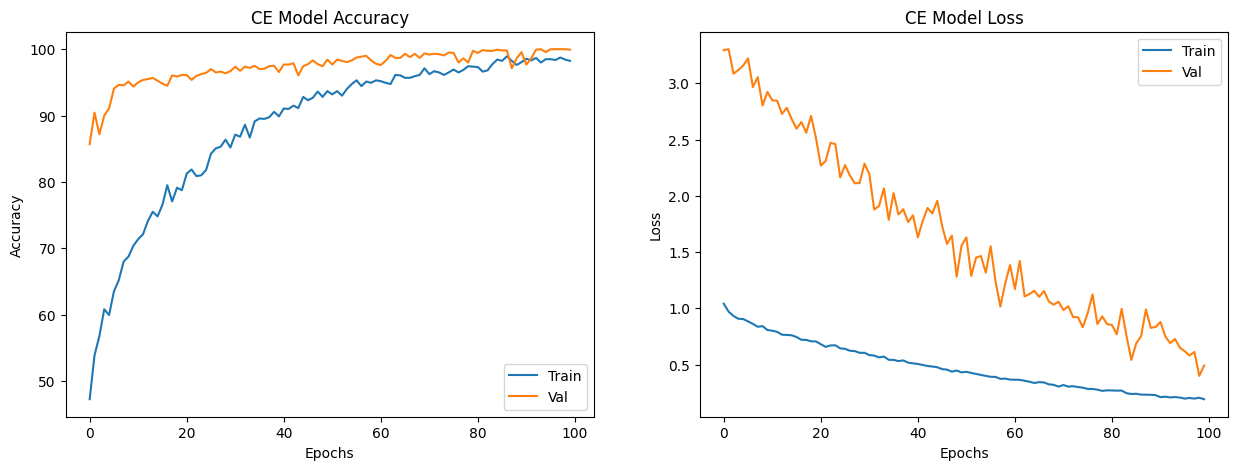

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('CE Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('CE Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

#BCE

In [ ]:
# # Download dataset
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/normal.npy
# !wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/pneumonia.npy

--2023-10-14 17:47:43--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/normal.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65536128 (62M) [application/octet-stream]
Saving to: ‘normal.npy.1’

normal.npy.1        100%[===================>]  62.50M   254MB/s    in 0.2s    

2023-10-14 17:47:43 (254 MB/s) - ‘normal.npy.1’ saved [65536128/65536128]



In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

import numpy as np

# Load Dataset
abnormal_scans = np.load('pneumonia.npy')
normal_scans = np.load('normal.npy')

print(f'Shape of abnormal_scans: {abnormal_scans.shape}')
print(f'Shape of normal_scans: {normal_scans.shape}')

# For the data having presence of pneumonia assign 1, for the normal ones assign 0.

abnormal_labels = np.ones((abnormal_scans.shape[0],))
normal_labels = np.zeros((normal_scans.shape[0],))

split_point = 800

x_train = np.concatenate((abnormal_scans[:split_point], normal_scans[:split_point]), axis=0)
y_train = np.concatenate((abnormal_labels[:split_point], normal_labels[:split_point]), axis=0)
x_val = np.concatenate((abnormal_scans[split_point:], normal_scans[split_point:]), axis=0)
y_val = np.concatenate((abnormal_labels[split_point:], normal_labels[split_point:]), axis=0)

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')
print(f'X_train: max value is {x_train.max().item()}, min value is {x_train.min().item()}, data type is {x_train.dtype}.')

Shape of abnormal_scans: (1000, 256, 256)
Shape of normal_scans: (1000, 256, 256)
Number of samples in train and validation are 1600 and 400.
X_train: max value is 255.0, min value is 0.0, data type is torch.float32.


In [ ]:
import torch.nn as nn

# Model in Lab 2
# model = nn.Sequential(
#     nn.Flatten(),
#     nn.Linear(256*256*1, 256),
#     nn.ReLU(),
#     nn.Linear(256, 1)
# ).cuda()

model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(256*256*1, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 1)
).cuda()

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=65536, out_features=64, bias=True)
  (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=64, out_features=64, bias=True)
  (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=64, out_features=64, bias=True)
  (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100
best_val_loss = float('inf')

# Criterion and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
# lr_scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

for epoch in range(epochs):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        images = images / 255.
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.float().unsqueeze(1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = torch.sigmoid(outputs) > 0.5
        train_correct += (train_predicted.float() == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = images / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.float().unsqueeze(1)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = torch.sigmoid(outputs) > 0.5
            correct += (predicted.float() == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    # Learning rate update
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'model_classification02.pth')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

Epoch 1/100, Train Loss: 0.0171, Train Accuracy: 99.19%, Val Loss: 0.2146, Val Accuracy: 94.00%
Epoch 2/100, Train Loss: 0.0332, Train Accuracy: 99.12%, Val Loss: 0.2057, Val Accuracy: 95.00%
Epoch 3/100, Train Loss: 0.0192, Train Accuracy: 99.50%, Val Loss: 0.2000, Val Accuracy: 94.25%
Epoch 4/100, Train Loss: 0.0238, Train Accuracy: 99.12%, Val Loss: 0.2125, Val Accuracy: 94.00%
Epoch 5/100, Train Loss: 0.0288, Train Accuracy: 99.12%, Val Loss: 0.2097, Val Accuracy: 94.25%
Epoch 6/100, Train Loss: 0.0169, Train Accuracy: 99.25%, Val Loss: 0.2114, Val Accuracy: 94.25%
Epoch 7/100, Train Loss: 0.0121, Train Accuracy: 99.56%, Val Loss: 0.2070, Val Accuracy: 94.00%
Epoch 8/100, Train Loss: 0.0112, Train Accuracy: 99.69%, Val Loss: 0.2009, Val Accuracy: 94.25%
Epoch 9/100, Train Loss: 0.0125, Train Accuracy: 99.75%, Val Loss: 0.1940, Val Accuracy: 94.25%
Epoch 10/100, Train Loss: 0.0220, Train Accuracy: 99.38%, Val Loss: 0.2026, Val Accuracy: 94.25%
Epoch 11/100, Train Loss: 0.0090, Train

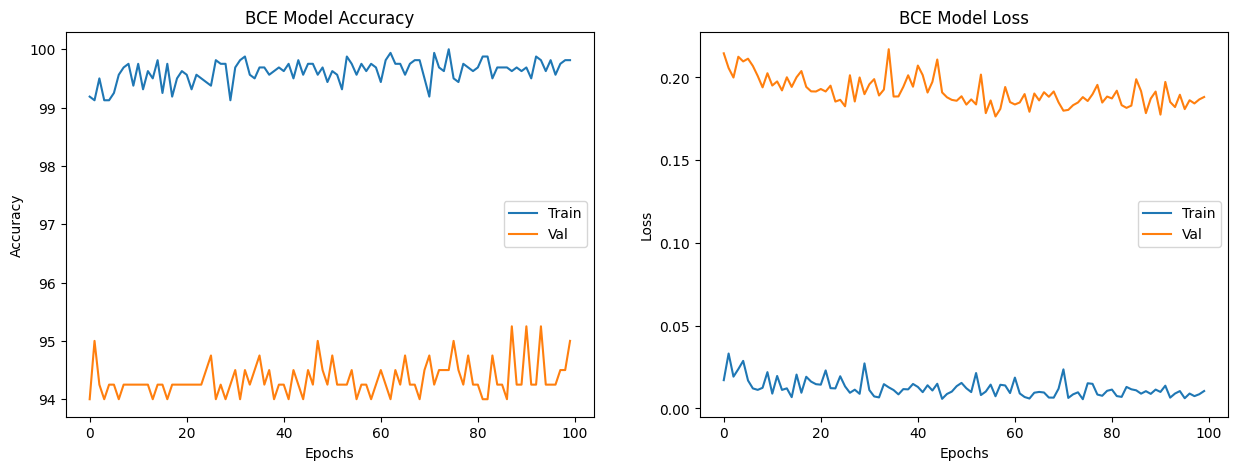

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('BCE Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('BCE Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()